# NLP UNIT 3

In [3]:
%matplotlib inline
import nltk, gensim
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg


## Word embedding training


In [13]:
def train_model(fileid):
    """
        training a gensim model, see also: https://radimrehurek.com/gensim/models/word2vec.html
    """
    # min-count: only include words in the model with a min-count
    return gensim.models.Word2Vec(gutenberg.sents(fileid), min_count=5, size=300, 
                                  workers=4, window=10, sg=1, negative=5, iter=10)


In [ ]:
model = train_model('shakespeare-hamlet.txt')
model


In [ ]:
print(model.most_similar(positive=['Hamlet']))
print()
print(model.most_similar(positive=['King']))
print()
print(model.most_similar(positive=['great']))



### Various functions:

In [16]:
## save model
model.save("hamlet.model") # binary format
model.wv.save_word2vec_format("hamlet.vec", binary=False) # text / vec format


In [ ]:
!head hamlet.vec

In [9]:
# load model
model = gensim.models.KeyedVectors.load_word2vec_format("hamlet.vec", binary=False) # text / vec format

In [ ]:
## what is the similarity between these words
print(model.similarity('great', 'well'))
print(model.similarity('great', 'death'))
print(model.similarity('Hamlet', 'well'))
print(model.similarity('King', 'Queene'))

  

In [ ]:
## most similar to a single word
print("King", model.most_similar("King"))

## words that are **most far away** from input .. 
## nothing useful there for this model
print(model.most_similar(negative=['Lord', "Reynol"]))
print(model.most_similar(negative=['Hamlet']))


 


In [ ]:
### Analogy reasoning

In [ ]:
# model.most_similar(positive=['like','teh'],negative=['the'])
print("king-queen", model.most_similar(positive=["King",'woman'],negative=['man']) )
#print("superlative: good-better", model.most_similar(positive=["good",'bigger'],negative=['big']) )
print("superlative: good-better", model.most_similar(positive=["best",'bad'],negative=['good']) )



In [45]:
import gensim.downloader as api
from gensim.models import FastText


text = api.load('text8')
#model = FastText(text, size=4, window=3, min_count=5, iter=10)

text = api.load('text8')
model = gensim.models.Word2Vec(text, min_count=5, size=300, 
                                  workers=4, window=10, sg=1, negative=5, iter=5)



In [46]:
model.save("text8.model") # binary format


In [50]:
model.most_similar(positive=["woman"])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('girl', 0.5719791650772095),
 ('marriageable', 0.5341780185699463),
 ('women', 0.5338364839553833),
 ('man', 0.5302542448043823),
 ('fathering', 0.5201246738433838),
 ('guamanian', 0.5139300227165222),
 ('maternity', 0.5129960179328918),
 ('divorces', 0.5117337703704834),
 ('seduces', 0.5112107396125793),
 ('spinster', 0.5082893371582031)]

In [52]:
print("king-queen", model.most_similar(positive=["king",'woman'],negative=['man']) )
#print("superlative: good-better", model.most_similar(positive=["good",'bigger'],negative=['big']) )
print("superlative: good-better", model.most_similar(positive=["best",'bad'],negative=['good']) )

king-queen [('queen', 0.5241947174072266), ('infanta', 0.4640105366706848), ('henrietta', 0.4589478373527527), ('daughter', 0.45729348063468933), ('valois', 0.4529213309288025), ('regnant', 0.4506695866584778), ('marrying', 0.4491432309150696), ('eleonora', 0.4478476047515869), ('urraca', 0.44519126415252686), ('yolande', 0.4426528215408325)]
superlative: good-better [('bafta', 0.48808908462524414), ('filmfare', 0.4844830334186554), ('oscars', 0.48110130429267883), ('worst', 0.45849645137786865), ('dicaprio', 0.4513181447982788), ('nominations', 0.4492705464363098), ('awards', 0.4393504858016968), ('photoplay', 0.43287116289138794), ('oscar', 0.43076854944229126), ('award', 0.429019033908844)]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
print("superlative: good-better", model.most_similar(positive=["boy",'woman'],negative=['man']) )

superlative: good-better [('girl', 0.4392324686050415), ('children', 0.40296924114227295), ('child', 0.4010913670063019), ('daughter', 0.37874484062194824), ('girls', 0.3694722056388855), ('agassi', 0.3668133020401001), ('orphan', 0.36657896637916565), ('satsuki', 0.3613031506538391), ('nintendo', 0.359235942363739), ('desiree', 0.35887596011161804)]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


### visualize a model

In [55]:
import gensim
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import codecs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from nltk.corpus import stopwords

In [64]:
# see also: https://www.quora.com/How-do-I-visualise-word2vec-word-vectors
# see also: https://raw.githubusercontent.com/devmount/GermanWordEmbeddings/master/visualize.py 

def viz(pca=True):

    wv, vocabulary = load_embeddings("hamlet.vec")

    if pca:
        pca = PCA(n_components=2, whiten=True)
        Y = pca.fit(wv[:300,:]).transform(wv[:300,:])
    else:
        tsne = TSNE(n_components=2, random_state=0)
        Y = tsne.fit_transform(wv[:200,:])

    np.set_printoptions(suppress=True)

    plt.scatter(Y[:, 0], Y[:, 1])
    for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
        if label.lower() not in stopwords.words('english'):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()
    
def load_embeddings(file_name):


    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in f_in if len(line.strip().split()) != 2])

        wv = np.loadtxt(wv)

    return wv, vocabulary



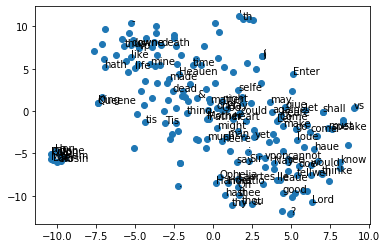

In [65]:
viz(pca=False)
